In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
if False:
    reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2022060804_sve_GP53F.txt", delimiter="\t", encoding="ansi", chunksize=1)
    df_dades = reader.get_chunk()
    print(df_dades)
    print(df_dades.columns)

    count=0
    for i in df_dades.columns:
        print(i, count)
        count+=1


#reader = pd.read_csv("../../dades/dades posturograf/2022071305_sve_FJ52F.txt", delimiter="\t", encoding="ansi", chunksize=2)
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2022060804_sve_GP53F.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)

df_dades = reader.get_chunk()
#print(df_dades)
#print(df_dades.columns)
#num_test = df_dades[['Nº_ROA','Nº_ROC','Nº_RGA','Nº_RGC']].values.tolist()

#'Nº_test', 'Val_test',Rep_test', 'EstML_test', 'EstAP_test'
roa = df_dades.iloc[:,16:21].values.tolist()
roc = df_dades.iloc[:,21:26].values.tolist()
rga = df_dades.iloc[:,26:31].values.tolist()
rgc = df_dades.iloc[:,31:36].values.tolist()

##SOM VIS VEST
result = df_dades.iloc[:,53:56].values.tolist()

print(roa)
print(roc)
print(rga)
print(rgc)
print(result)

num_test = roa[0][0] + roc[0][0] + rga[0][0] + rgc[0][0]
print("Total tests")
print(num_test)

[[2.0, 100.0, 100.0, 100.0, 97.498957]]
[[2.0, 100.0, 100.0, 100.0, 97.649432]]
[[2.0, 99.076211, 100.0, 100.0, 100.0]]
[[2.0, 100.0, 100.0, 100.0, 100.0]]
[[98.347141, 96.619423, 100.0]]
Total tests
8.0


In [77]:
df_dades

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,2022060804,JULIA,GONZALEZ PIRIS,Mujer,NaN,13/6/1953,1520,94.842879,8/6/2022,68,...,-,0.0,-,0,-,-,0,-,-,NaN


In [3]:
print(roc[0][1]/roa[0][1])
print(rga[0][1]/roa[0][1])
print(rgc[0][1]/roa[0][1])


1.0
0.99076211
1.0


In [4]:
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2022060804_sve_GP53F.txt", delimiter="\t", encoding="ansi", skiprows=2, chunksize=num_test, index_col=False)
df_resultats = reader.get_chunk()

df_resultats


,NºHistorial,Prueba ROMBERG,Numero,Desplaz.Total(mm),Angulo Desplaz.(º),Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Frec (Hz),Duración (s)
0,2022060804,ROA,1,8.921964,118.481163,2.131420,2.915280,23.448344,0.011263,10.62,17.77,6.49,7.92,40.0,30.0
1,2022060804,ROC,2,6.571851,167.186748,2.130399,6.970726,59.354058,0.021895,13.63,38.40,12.91,13.94,40.0,30.0
2,2022060804,ROA,3,12.500723,123.906481,2.190271,3.932406,33.187799,0.010991,9.43,22.12,7.13,10.11,40.0,30.0
3,2022060804,ROC,4,10.436488,152.121677,2.098464,6.924988,57.088264,0.015055,12.17,32.06,7.96,8.59,40.0,30.0
4,2022060804,RGA,5,12.074167,207.402205,7.269807,8.737499,254.077717,0.022423,37.18,43.89,11.27,17.01,40.0,30.0
5,2022060804,RGC,6,26.701719,243.374545,8.029598,14.159341,420.008668,0.049107,40.75,57.15,19.94,26.94,40.0,30.0
6,2022060804,RGA,7,14.663043,207.223301,6.442570,7.535181,194.180326,0.019334,35.03,35.59,13.38,12.58,40.0,30.0
7,2022060804,RGC,8,19.408093,240.127947,11.065200,14.081917,617.165048,0.058736,55.27,70.85,19.37,38.14,40.0,30.0


In [5]:
df_resultats = df_resultats.drop(columns=['NºHistorial'])
print("Dades resultats")
print(df_resultats.columns)
print(df_resultats)

Dades resultats
Index(['Prueba ROMBERG', 'Numero', 'Desplaz.Total(mm)', 'Angulo Desplaz.(º)',
       'Dispers ML (mm)', 'Dispers AP (mm)', 'Area barrida (mm2)',
       'Velocidad media (m/s)', 'Desplazam.ML (mm)', 'Desplazam.AP(mm)',
       'Fuerza Max ML (N)', 'Fuerza Max AP (N)', 'Frec (Hz)', 'Duración (s)'],
      dtype='object')
  Prueba ROMBERG  Numero  Desplaz.Total(mm)  Angulo Desplaz.(º)  \
0            ROA       1           8.921964          118.481163   
1            ROC       2           6.571851          167.186748   
2            ROA       3          12.500723          123.906481   
3            ROC       4          10.436488          152.121677   
4            RGA       5          12.074167          207.402205   
5            RGC       6          26.701719          243.374545   
6            RGA       7          14.663043          207.223301   
7            RGC       8          19.408093          240.127947   

   Dispers ML (mm)  Dispers AP (mm)  Area barrida (mm2)  \
0 

In [6]:
df_resultats['test'] = df_resultats['Prueba ROMBERG'] + df_resultats['Numero'].astype(str)
df_resultats

,Prueba ROMBERG,Numero,Desplaz.Total(mm),Angulo Desplaz.(º),Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Frec (Hz),Duración (s),test
0,ROA,1,8.921964,118.481163,2.131420,2.915280,23.448344,0.011263,10.62,17.77,6.49,7.92,40.0,30.0,ROA1
1,ROC,2,6.571851,167.186748,2.130399,6.970726,59.354058,0.021895,13.63,38.40,12.91,13.94,40.0,30.0,ROC2
2,ROA,3,12.500723,123.906481,2.190271,3.932406,33.187799,0.010991,9.43,22.12,7.13,10.11,40.0,30.0,ROA3
3,ROC,4,10.436488,152.121677,2.098464,6.924988,57.088264,0.015055,12.17,32.06,7.96,8.59,40.0,30.0,ROC4
4,RGA,5,12.074167,207.402205,7.269807,8.737499,254.077717,0.022423,37.18,43.89,11.27,17.01,40.0,30.0,RGA5
5,RGC,6,26.701719,243.374545,8.029598,14.159341,420.008668,0.049107,40.75,57.15,19.94,26.94,40.0,30.0,RGC6
6,RGA,7,14.663043,207.223301,6.442570,7.535181,194.180326,0.019334,35.03,35.59,13.38,12.58,40.0,30.0,RGA7
7,RGC,8,19.408093,240.127947,11.065200,14.081917,617.165048,0.058736,55.27,70.85,19.37,38.14,40.0,30.0,RGC8


In [7]:
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2022060804_sve_GP53F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)), chunksize=1200, index_col=False)
df_dades_postu_XY = reader.get_chunk()
df_dades_postu_XY

,ROA1_X,ROA1_Y,ROC2_X,ROC2_Y,ROA3_X,ROA3_Y,ROC4_X,ROC4_Y,RGA5_X,RGA5_Y,RGC6_X,RGC6_Y,RGA7_X,RGA7_Y,RGC8_X,RGC8_Y,Unnamed: 16
0,-0.012616,-1.861942,-14.612616,16.128058,-5.862616,21.378058,-10.232616,23.538058,0.312527,3.117224,-9.397473,-6.342776,-8.927473,-14.372776,-6.517473,18.307224,NaN
1,-0.082616,-1.621942,-14.632616,15.898058,-5.812616,20.848058,-10.012616,23.048058,0.162527,3.957224,-9.297473,-6.232776,-9.157473,-14.952776,-6.127473,19.137224,NaN
2,-0.052616,-1.121942,-14.502616,15.908058,-5.742616,20.408058,-9.842616,22.388058,-0.237473,4.557224,-9.267473,-6.042776,-9.697473,-15.302776,-5.797473,19.977224,NaN
3,-0.192616,-0.101942,-14.352616,15.948058,-5.632616,19.798058,-9.472616,21.678058,-0.327473,4.897224,-9.027473,-5.662776,-10.367473,-15.372776,-5.737473,20.467224,NaN
4,-0.602616,0.898058,-14.102616,15.988058,-6.002616,18.978058,-9.052616,20.748058,-0.367473,4.827224,-8.847473,-5.282776,-10.927473,-15.602776,-5.607473,20.447224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-5.662616,9.338058,-7.292616,1.218058,-8.862616,18.088058,-8.032616,-5.841942,-20.237473,-13.212776,-18.987473,-31.192776,-7.117473,3.527224,-9.767473,-26.492776,NaN
1196,-5.692616,9.318058,-7.312616,0.648058,-8.932616,17.468058,-8.102616,-5.761942,-20.537473,-13.522776,-18.907473,-31.622776,-6.957473,3.767224,-10.297473,-25.792776,NaN
1197,-5.672616,9.378058,-7.442616,0.118058,-9.002616,16.838058,-8.082616,-5.681942,-20.797473,-13.822776,-19.027473,-31.382776,-6.767473,4.057224,-10.737473,-24.672776,NaN
1198,-5.682616,9.518058,-7.532616,-0.351942,-9.122616,15.948058,-8.062616,-5.631942,-20.997473,-14.122776,-19.157473,-30.782776,-6.897473,4.057224,-10.777473,-24.012776,NaN


In [8]:
df_dades_postu_FxFy  = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2022060804_sve_GP53F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False)
df_dades_postu_FxFy

,ROA1_Fx,ROA1_Fy,ROC2_Fx,ROC2_Fy,ROA3_Fx,ROA3_Fy,ROC4_Fx,ROC4_Fy,RGA5_Fx,RGA5_Fy,RGC6_Fx,RGC6_Fy,RGA7_Fx,RGA7_Fy,RGC8_Fx,RGC8_Fy,Unnamed: 16
0,10.17,11.79,10.94,11.41,4.22,3.93,5.87,3.98,2.43,9.18,6.60,8.97,4.42,12.79,1.71,0.45,NaN
1,9.96,11.48,10.91,10.91,4.43,4.63,5.92,4.29,2.04,8.47,6.63,8.95,4.77,12.66,1.24,-0.17,NaN
2,9.54,11.10,11.05,10.77,4.39,4.97,6.02,4.54,1.97,7.86,6.61,9.32,4.66,12.18,0.70,-1.55,NaN
3,9.17,9.89,10.99,10.40,4.38,5.11,6.24,5.13,2.13,7.72,6.36,9.00,4.70,12.15,0.62,-2.43,NaN
4,8.96,9.13,10.85,10.42,4.83,5.58,6.37,6.12,2.27,8.26,6.45,8.44,4.75,12.05,0.67,-2.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,8.50,8.07,10.03,5.71,6.24,3.73,11.50,8.45,11.19,9.91,10.75,17.86,1.99,8.78,9.53,7.09,NaN
1196,8.58,8.29,10.35,6.70,6.39,4.11,11.63,8.29,11.57,10.13,10.95,19.26,1.90,8.83,9.56,6.98,NaN
1197,8.65,8.33,10.48,7.11,6.78,4.36,11.77,8.23,11.72,10.46,10.91,18.80,1.73,8.09,9.09,6.00,NaN
1198,8.55,8.25,10.75,7.08,7.17,4.69,11.69,8.22,11.90,10.85,10.22,18.02,2.01,7.65,9.04,5.23,NaN


In [9]:
df_dades_postu_XY['ROA1_X']

0      -0.012616
1      -0.082616
2      -0.052616
3      -0.192616
4      -0.602616
          ...   
1195   -5.662616
1196   -5.692616
1197   -5.672616
1198   -5.682616
1199   -5.552616
Name: ROA1_X, Length: 1200, dtype: float64

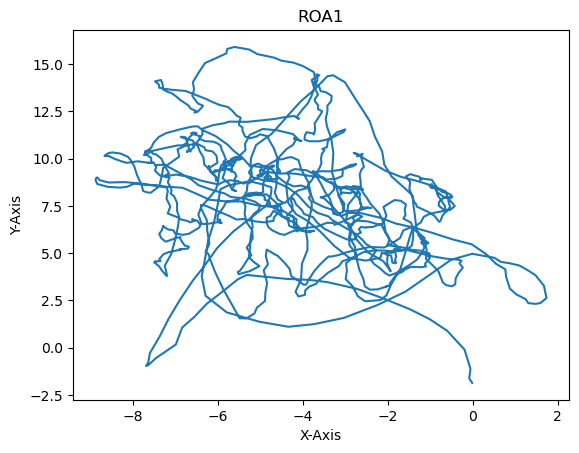

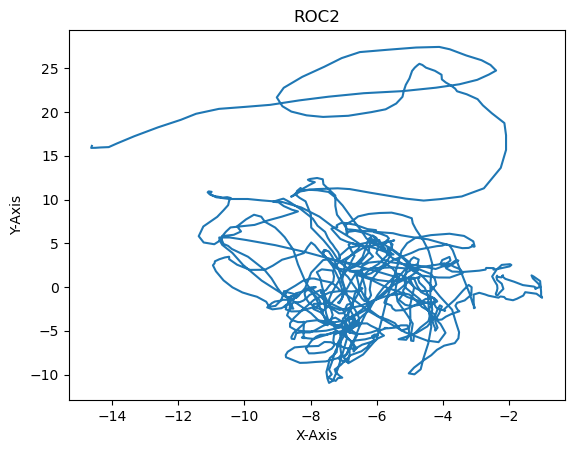

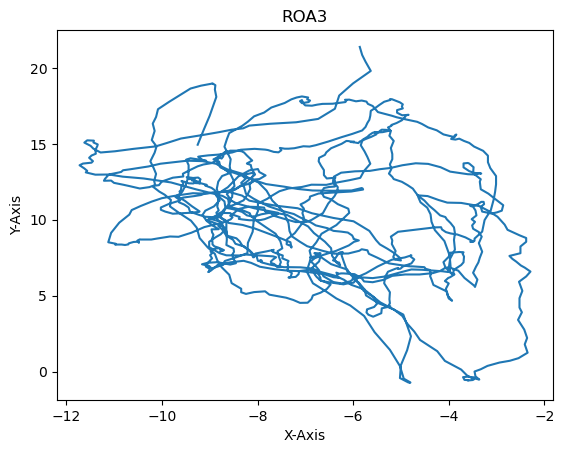

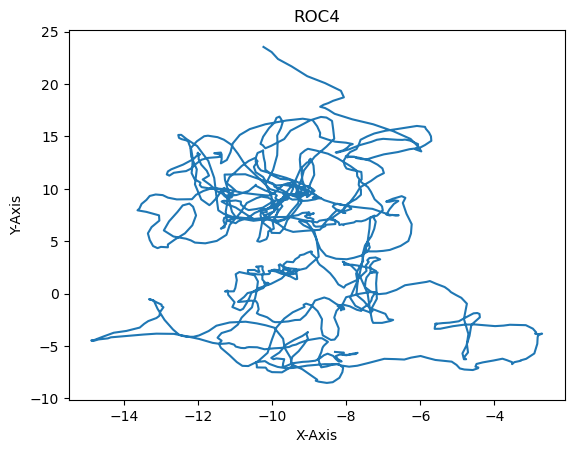

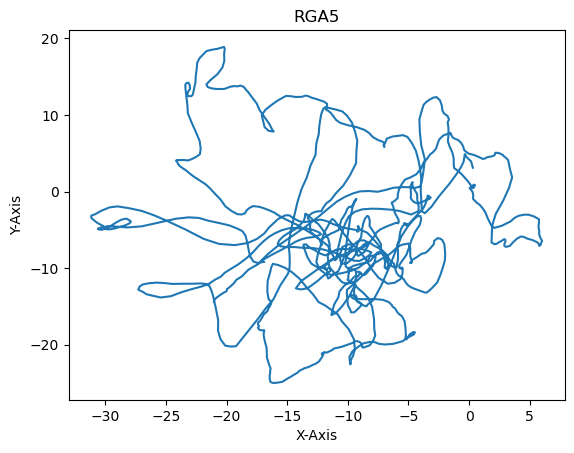

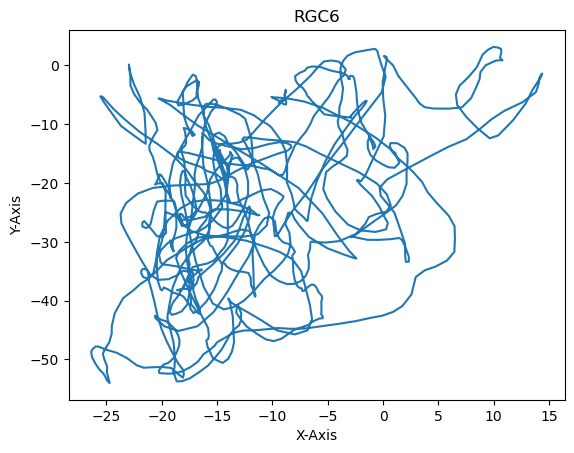

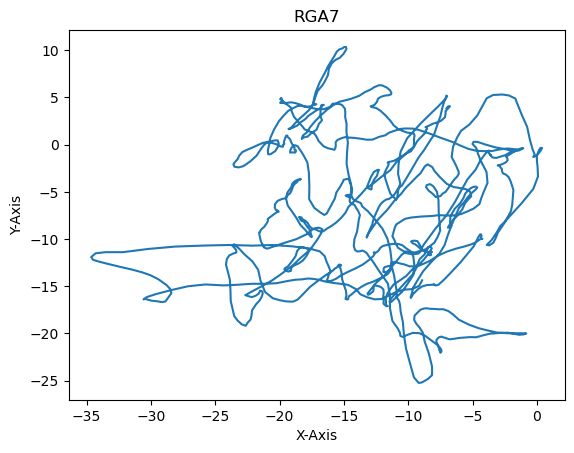

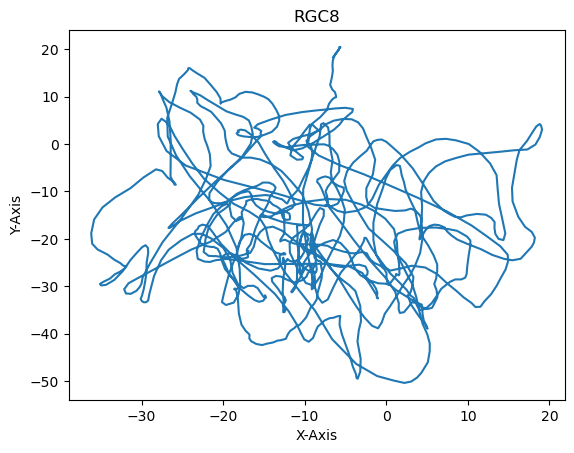

In [10]:
llista_test = df_resultats['test'].tolist()

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    plt.plot(punts_X,punts_Y)
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.title(item)
    plt.show()
    #punts_Fx = df_dades_postu_FxFy["ROA1_Fx"].values.tolist()
    #punts_Fy = df_dades_postu_FxFy["ROA1_Fy"].values.tolist()
    #plt.plot(punts_Fx,punts_Fy)
    #plt.xlabel("X-Axis")
    #plt.ylabel("Y-Axis")
    #plt.title("Fx Fy values Postu")
    #plt.show()


## Càlcul desplaçament total

Càlcul del centre del núvol de punts(mitjana).

In [11]:
llista_test = df_resultats['test'].tolist()

desplaz_total = {}

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    desplaz_total[item] = np.sqrt((sum(punts_X)/len(punts_X))**2 + (sum(punts_Y)/len(punts_Y))**2)

In [12]:
df_resultats['Desplaz.Total(mm)']

0     8.921964
1     6.571851
2    12.500723
3    10.436488
4    12.074167
5    26.701719
6    14.663043
7    19.408093
Name: Desplaz.Total(mm), dtype: float64

In [13]:
desplaz_total

{'ROA1': 8.921943101245159,
 'ROC2': 6.571840005995327,
 'ROA3': 12.50075198226949,
 'ROC4': 10.43647934398766,
 'RGA5': 12.074165089005904,
 'RGC6': 26.701711268854776,
 'RGA7': 14.663042955107576,
 'RGC8': 19.408093343874032}

## Càlcul Angle total

Calcular angle del vector del centre del núvol de punts, cambiar quadrant al que pertany?¿??¿¿?¿?¿?

In [14]:
angle_total = {}

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    angle_total[item] = math.degrees(math.atan((sum(punts_Y)/len(punts_Y))/(sum(punts_X)/len(punts_X))))

In [15]:
df_resultats['Angulo Desplaz.(º)']

0    118.481163
1    167.186748
2    123.906481
3    152.121677
4    207.402205
5    243.374545
6    207.223301
7    240.127947
Name: Angulo Desplaz.(º), dtype: float64

In [16]:
angle_total

{'ROA1': -61.51875876660169,
 'ROC2': -12.81283050143032,
 'ROA3': -56.09360673011521,
 'ROC4': -27.878217692687965,
 'RGA5': 27.402215453236373,
 'RGC6': 63.37454563598184,
 'RGA7': 27.22330666124347,
 'RGC8': 60.12797256306157}

## Càlcul dispersió ML i AP

Calcular la desviació estàndard dels punts en X i en Y per separat.

In [17]:
dispersio_ML = {}
dispersio_AP = {}

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    centre_X = sum(punts_X)/(len(punts_X)-1)
    centre_Y = sum(punts_Y)/(len(punts_Y)-1)
    dispersio_ML[item] = np.sqrt(sum([((x - centre_X) ** 2) for x in punts_X]) / (len(punts_X)-1))
    dispersio_AP[item] = np.sqrt(sum([((y - centre_Y) ** 2) for y in punts_Y]) / (len(punts_Y)-1))

In [18]:
dispersio_ML

{'ROA1': 2.131423443747378,
 'ROC2': 2.1304065930148317,
 'ROA3': 2.190278804855998,
 'ROC4': 2.0984796445351823,
 'RGA5': 7.26978568428252,
 'RGC6': 8.029590317807822,
 'RGA7': 6.442578607999052,
 'RGC8': 11.065206524381939}

In [19]:
df_resultats['Dispers ML (mm)']

0     2.131420
1     2.130399
2     2.190271
3     2.098464
4     7.269807
5     8.029598
6     6.442570
7    11.065200
Name: Dispers ML (mm), dtype: float64

In [20]:
dispersio_AP

{'ROA1': 2.915294995046751,
 'ROC2': 6.970238159424775,
 'ROA3': 3.9329072034555095,
 'ROC4': 6.9249009108792,
 'RGA5': 8.737504779798194,
 'RGC6': 14.159361457312112,
 'RGA7': 7.535183914664586,
 'RGC8': 14.081896999770919}

In [21]:
df_resultats['Dispers AP (mm)']

0     2.915280
1     6.970726
2     3.932406
3     6.924988
4     8.737499
5    14.159341
6     7.535181
7    14.081917
Name: Dispers AP (mm), dtype: float64

## Càlcul Àrea barrida

Trobar valors propis de matriu de covariances de les dades.

In [22]:
Area_barrida = {}

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    points = np.vstack((punts_X, punts_Y)).T
    dades_centrades = points - np.mean(points, axis=0)
    covariance_matrix = np.cov(dades_centrades, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    Area_barrida[item] = np.sqrt(eigenvalues[0]*eigenvalues[1])*4

In [23]:
Area_barrida

{'ROA1': 23.44833531583217,
 'ROC2': 59.34993722722951,
 'ROA3': 33.19229669475415,
 'ROC4': 57.08741393572185,
 'RGA5': 254.07690662745844,
 'RGC6': 420.0083805628794,
 'RGA7': 194.18033251120798,
 'RGC8': 617.1642615912326}

In [24]:
df_resultats['Area barrida (mm2)']

0     23.448344
1     59.354058
2     33.187799
3     57.088264
4    254.077717
5    420.008668
6    194.180326
7    617.165048
Name: Area barrida (mm2), dtype: float64

## Càlcul velocitat mitjana

Calcular la distància total recorreguda sumant la distància entre tots els punts consecutius, passar-ho a metres i dividir entre el temps de la prova.

In [48]:
velocitat_mitjana = {}

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    points = np.vstack((punts_X, punts_Y)).T
    num_points = len(points)
    total_dist = 0.0

    for i in range(num_points - 1):
        total_dist += np.linalg.norm(points[i+1] - points[i])
            
    velocitat_mitjana[item] = (total_dist/1000)/30

In [49]:
velocitat_mitjana

{'ROA1': 0.011262509541796254,
 'ROC2': 0.021895387586089606,
 'ROA3': 0.010991193318456742,
 'ROC4': 0.015054673315319506,
 'RGA5': 0.022422877833171553,
 'RGC6': 0.04910731504053372,
 'RGA7': 0.019333925498125123,
 'RGC8': 0.05873580978129005}

In [50]:
df_resultats['Velocidad media (m/s)']

0    0.011263
1    0.021895
2    0.010991
3    0.015055
4    0.022423
5    0.049107
6    0.019334
7    0.058736
Name: Velocidad media (m/s), dtype: float64

## Càlcul desplaçament ML i AP

Distància entre el major i el menor punt en cada eix.

In [59]:
despl_max_ML = {}
despl_max_AP = {}

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    despl_max_ML[item] = np.max(punts_X) - np.min(punts_X)
    despl_max_AP[item] = np.max(punts_Y) - np.min(punts_Y)

In [60]:
despl_max_ML

{'ROA1': 10.620000000000001,
 'ROC2': 13.63,
 'ROA3': 9.43,
 'ROC4': 12.17,
 'RGA5': 37.18,
 'RGC6': 40.75,
 'RGA7': 35.03,
 'RGC8': 55.269999999999996}

In [54]:
df_resultats['Desplazam.ML (mm)']

0    10.62
1    13.63
2     9.43
3    12.17
4    37.18
5    40.75
6    35.03
7    55.27
Name: Desplazam.ML (mm), dtype: float64

In [61]:
despl_max_AP

{'ROA1': 17.77,
 'ROC2': 38.400000000000006,
 'ROA3': 22.12,
 'ROC4': 32.06,
 'RGA5': 43.89,
 'RGC6': 57.15,
 'RGA7': 35.59,
 'RGC8': 70.85}

In [56]:
df_resultats['Desplazam.AP(mm)']

0    17.77
1    38.40
2    22.12
3    32.06
4    43.89
5    57.15
6    35.59
7    70.85
Name: Desplazam.AP(mm), dtype: float64

## Càlcul força màxima

Diferència entre el punt de més i de menys força en cada eix.

In [70]:
forca_max_ML = {}
forca_max_AP = {}

for item in llista_test:
    forca_X = df_dades_postu_FxFy[item + "_Fx"].values.tolist()
    forca_Y = df_dades_postu_FxFy[item+"_Fy"].values.tolist()
    forca_max_ML[item] = np.max(forca_X) - np.min(forca_X)
    forca_max_AP[item] = np.max(forca_Y) - np.min(forca_Y)

In [71]:
forca_max_ML

{'ROA1': 6.489999999999999,
 'ROC2': 12.91,
 'ROA3': 7.13,
 'ROC4': 7.959999999999999,
 'RGA5': 11.270000000000001,
 'RGC6': 19.94,
 'RGA7': 13.38,
 'RGC8': 19.369999999999997}

In [72]:
df_resultats['Fuerza Max ML (N)']

0     6.49
1    12.91
2     7.13
3     7.96
4    11.27
5    19.94
6    13.38
7    19.37
Name: Fuerza Max ML (N), dtype: float64

In [73]:
forca_max_AP

{'ROA1': 7.919999999999999,
 'ROC2': 13.939999999999998,
 'ROA3': 10.11,
 'ROC4': 8.59,
 'RGA5': 17.009999999999998,
 'RGC6': 26.94,
 'RGA7': 12.58,
 'RGC8': 38.14}

In [65]:
df_resultats['Fuerza Max AP (N)']

0     7.92
1    13.94
2    10.11
3     8.59
4    17.01
5    26.94
6    12.58
7    38.14
Name: Fuerza Max AP (N), dtype: float64

In [25]:
from math import sqrt
 
# Function calculates distance
# between two points
def dist(p1, p2):
     
    x0 = p1[0] - p2[0]
    y0 = p1[1] - p2[1]
    return x0 * x0 + y0 * y0
 
# Function to find the maximum
# distance between any two points
def maxDist(p):
 
    n = len(p)
    maxm = 0
 
    # Iterate over all possible pairs
    for i in range(n):
        for j in range(i + 1, n):
             
            # Update maxm
            maxm = max(maxm, dist(p[i], p[j]))
 
    # Return actual distance
    return sqrt(maxm)
       

p = []
for i in range(len(punts_X)):
    p.append([punts_X[i],punts_Y[i]])
maxX = max(punts_X)
maxY = max(punts_Y)
minX = min(punts_X)
minY = min(punts_Y)

print(maxX ,maxX - punts_X[0])
print(maxY, maxY - punts_Y[0])

print(minX, minX - punts_X[0])
print(minY, minY - punts_Y[0])


# Function Call
print(maxDist(p))

19.102527 25.619999999999997
20.467224 2.16
-36.167473 -29.650000000000002
-50.382776 -68.69
71.49022660476045


-0.17778233121473955 -18.5480639194171 -0.13969699301005378 1.1855228832835481e-06
(-9.666481333333344, -16.829534333333335) -10.080850887180336


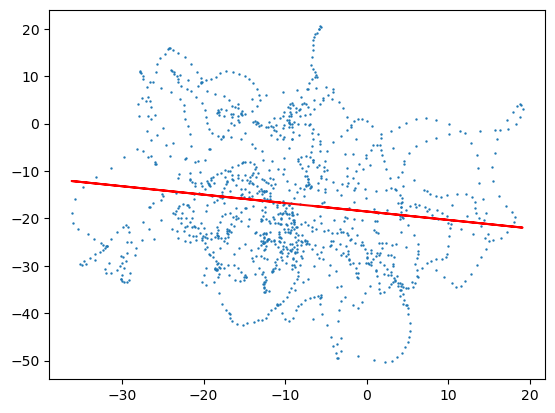

In [26]:
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Ellipse
import math


def myfunc(x):
  return slope * x + intercept

center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

slope, intercept, r, p, std_err = stats.linregress(punts_X, punts_Y)

angle_in_radians = math.atan(slope)
angle_in_degrees = math.degrees(angle_in_radians)
print(slope, intercept, r, p)
print(center, angle_in_degrees)

mymodel = list(map(myfunc, punts_X))

plt.scatter(punts_X, punts_Y, s=0.5)
plt.plot(punts_X, mymodel, 'r')
plt.show()

#fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
#ellipse = Ellipse(center, 10, 5, angle=angle_in_degrees, alpha=0.1)
#ax.add_artist(ellipse)

#ax.set_xlim(-5, 15)
#ax.set_ylim(-35, 0)

#plt.show()






Elipse - https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
(https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    print(ell_radius_x,ell_radius_y)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    return (ell_radius_x,ell_radius_y)
    #return ax.add_patch(ellipse)

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]



0.927525205582008 1.0675659197492462
0.927525205582008 1.0675659197492462
0.927525205582008 1.0675659197492462


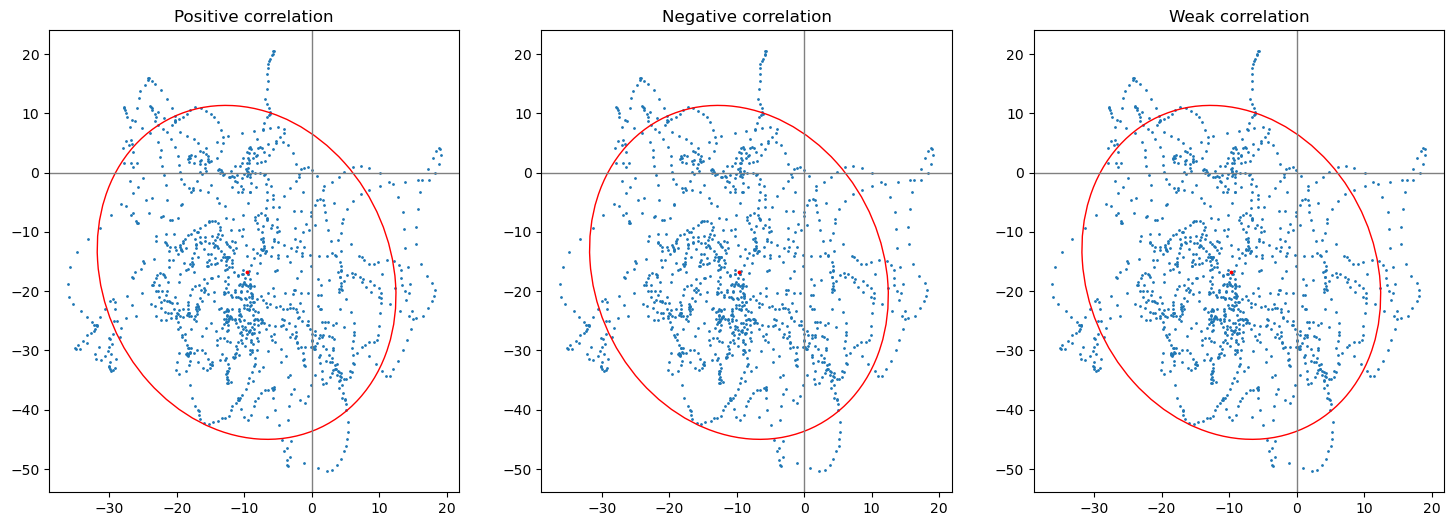

In [28]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

def myfunc(x):
  return slope * x + intercept

center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

slope, intercept, r, p, std_err = stats.linregress(punts_X, punts_Y)
angle_in_radians = math.atan(slope)
angle_in_degrees = math.degrees(angle_in_radians)

mu = center[0],center[1]
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    #x, y = get_correlated_dataset(800, dependency, mu, scale)
    #print(type(x))
    x = np.array(punts_X)
    y = np.array(punts_Y)
    ax.scatter(x, y, s=1)
    

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

    
plt.show()

0.8175435861208968 1.1539594814345016
0.8175435861208968 1.1539594814345016


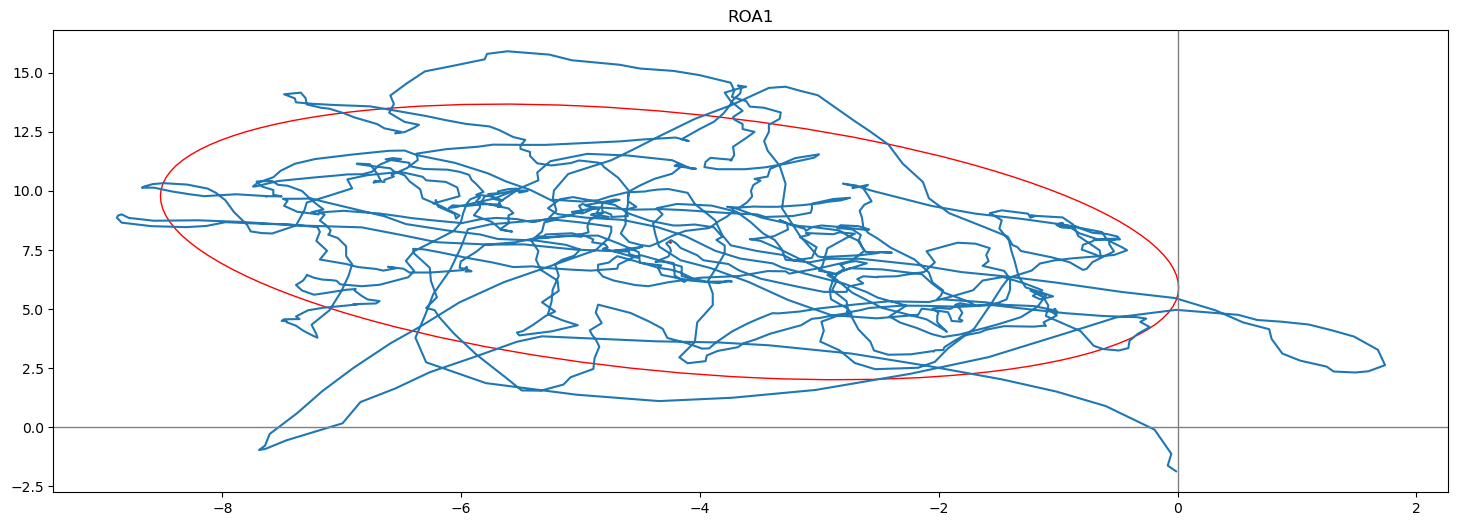

0.9797737971209306 1.0198251352438974
0.9797737971209306 1.0198251352438974


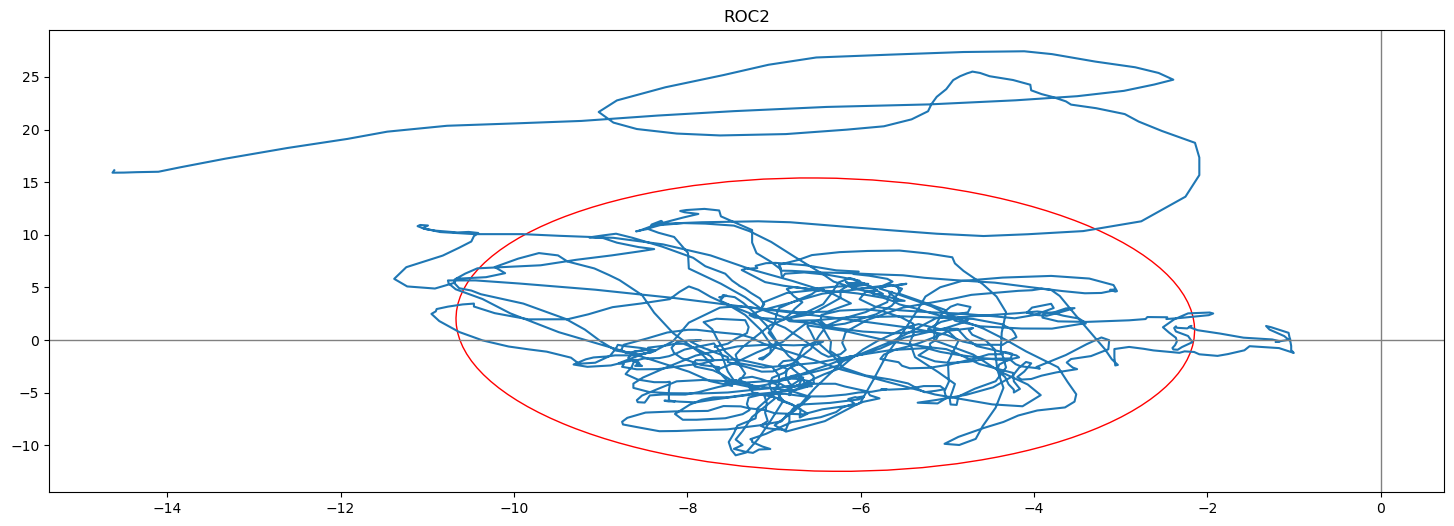

0.8553447165748372 1.1262261832454046
0.8553447165748372 1.1262261832454046


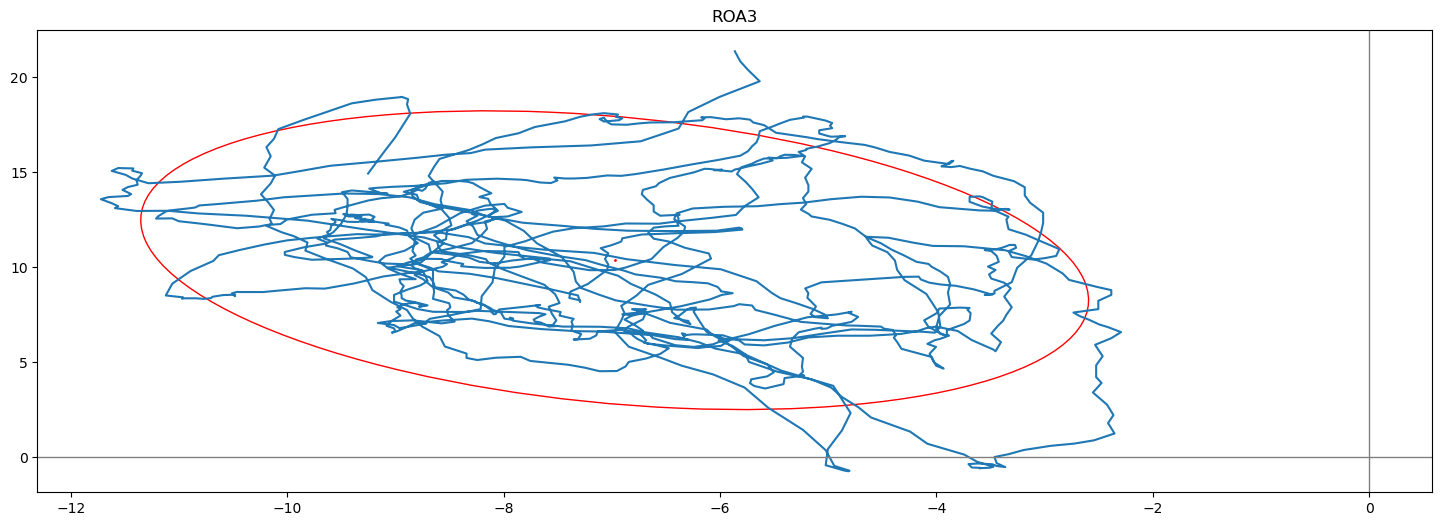

0.9009716378317595 1.0900688546246777
0.9009716378317595 1.0900688546246777


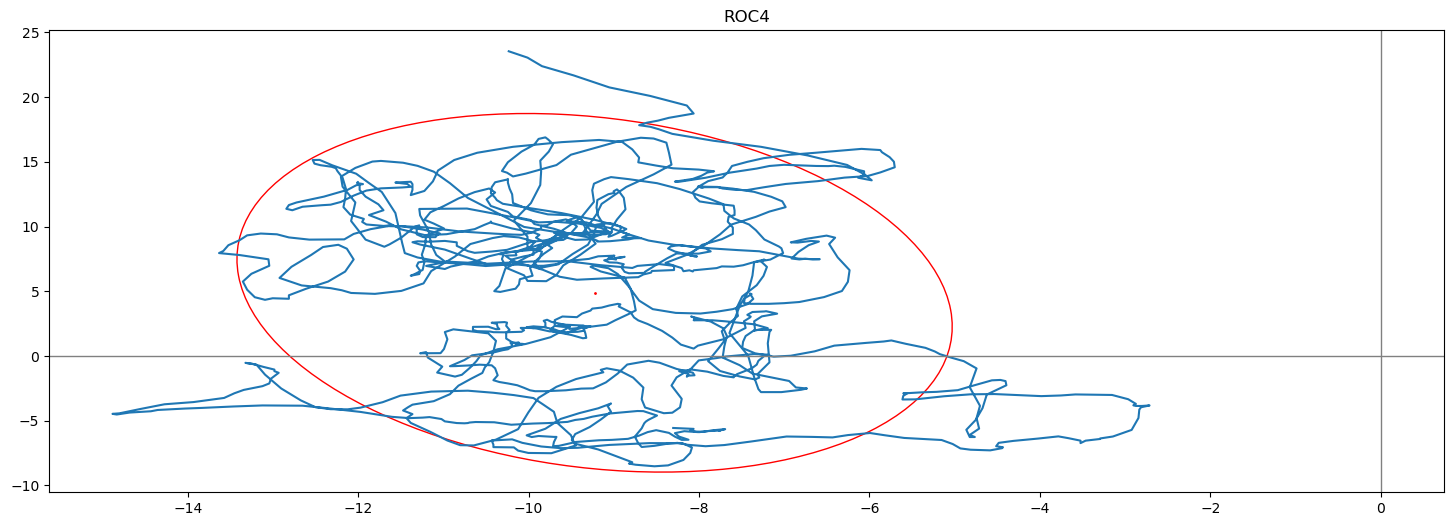

1.0019888138588084 0.9980072228705653
1.0019888138588084 0.9980072228705653


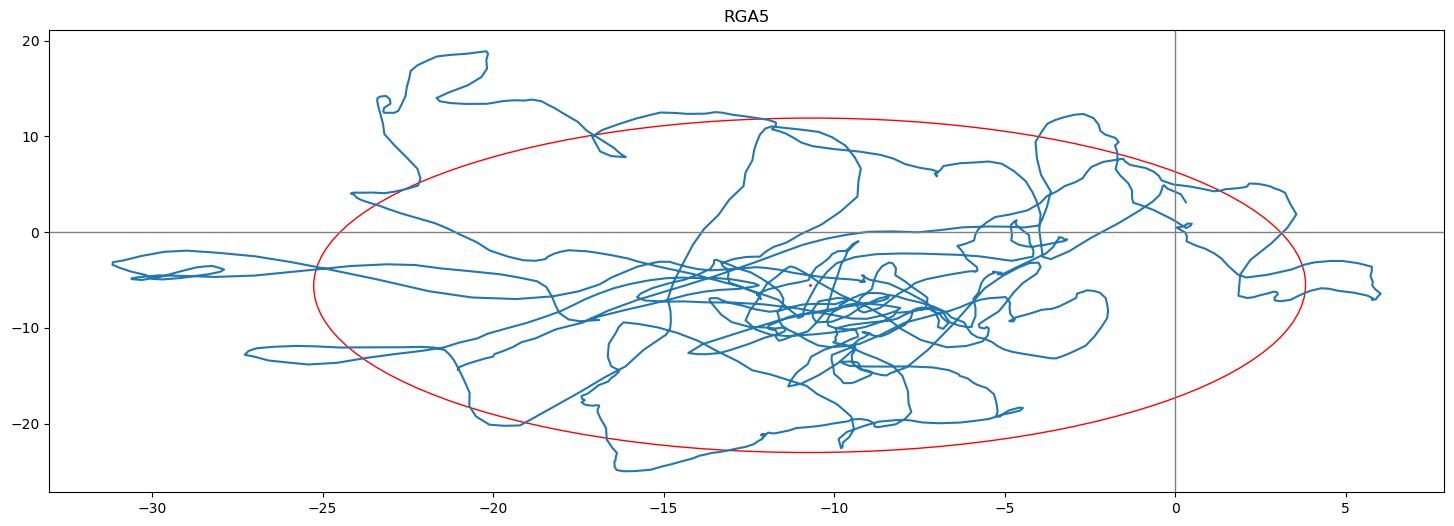

1.17621068102762 0.7851932461735404
1.17621068102762 0.7851932461735404


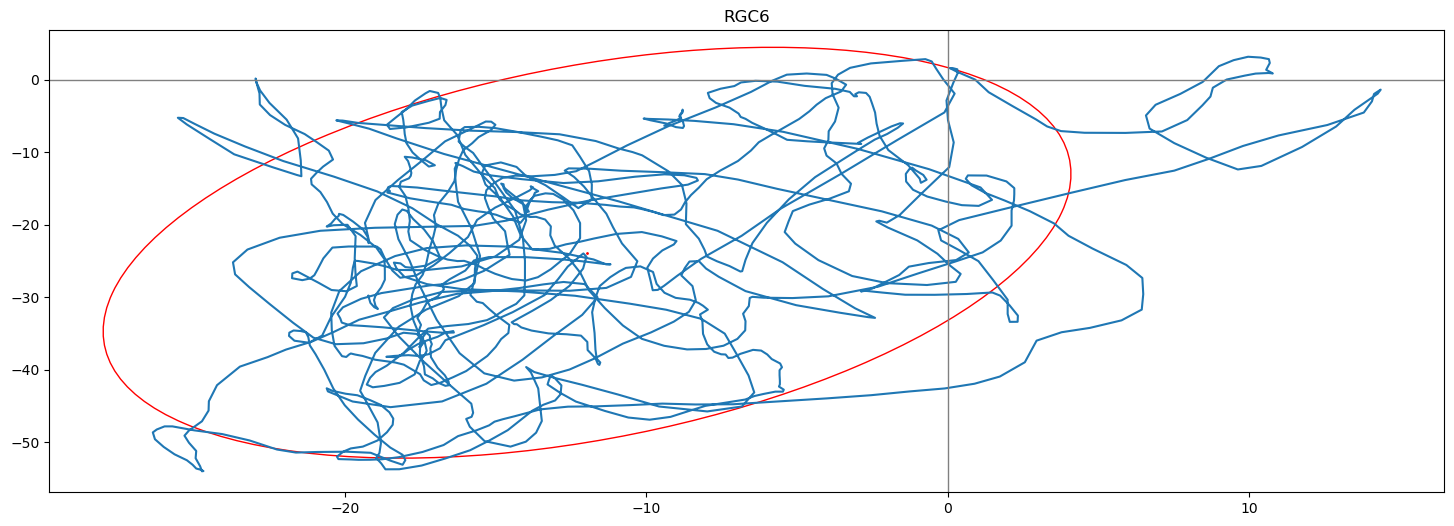

1.002952636418844 0.9970386196634964
1.002952636418844 0.9970386196634964


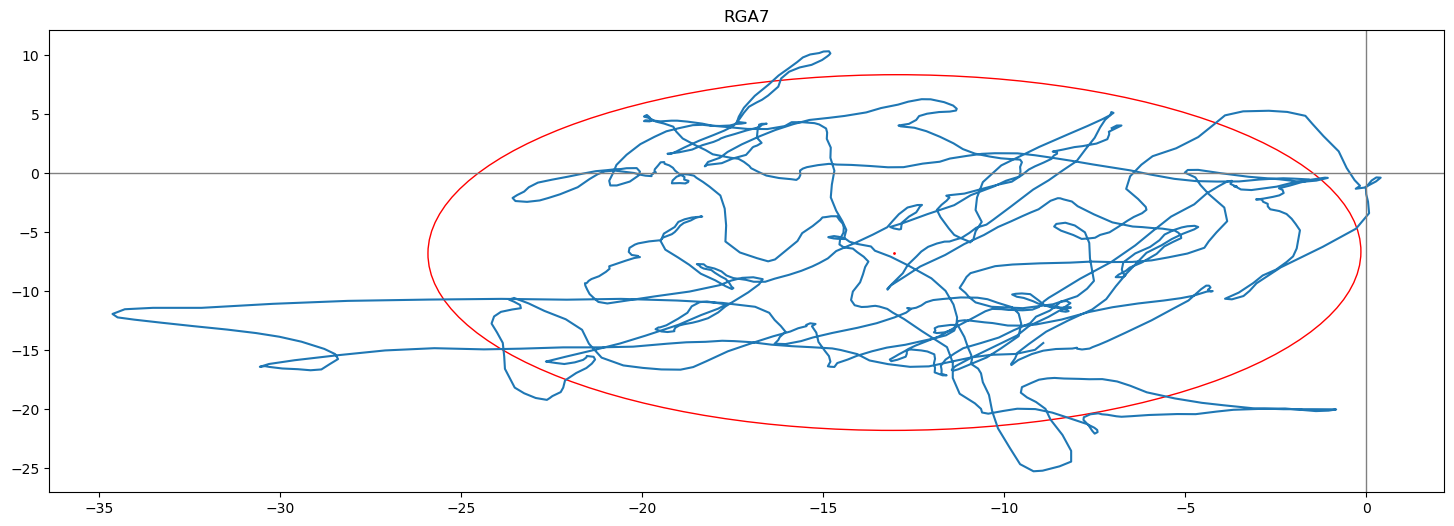

0.927525205582008 1.0675659197492462
0.927525205582008 1.0675659197492462


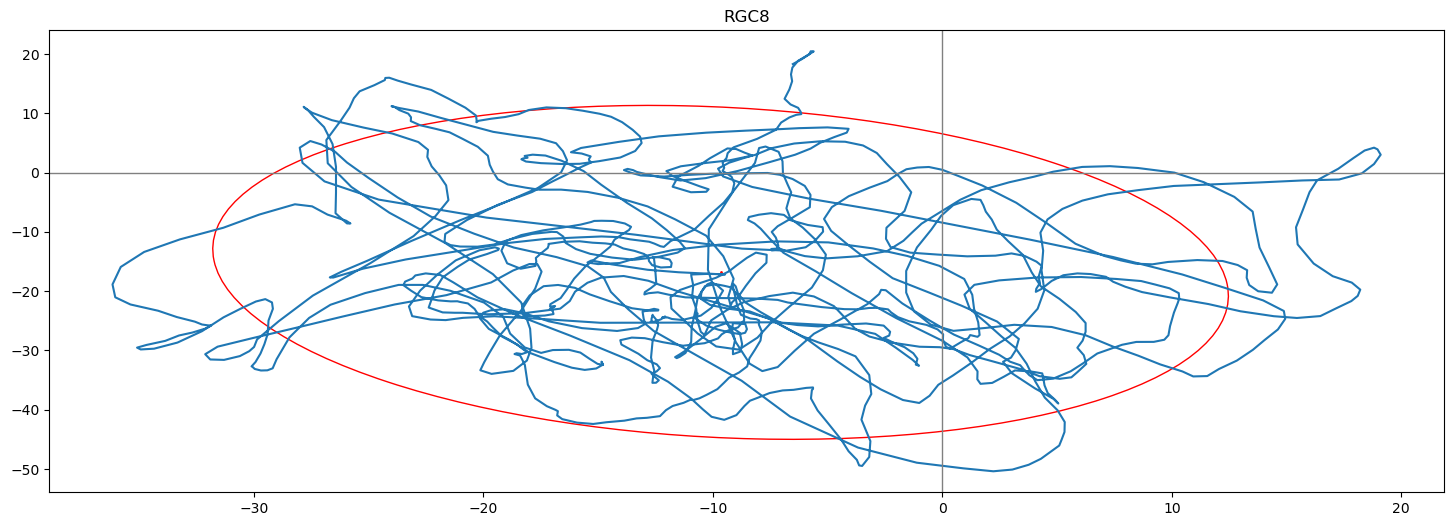

In [29]:
def print_elipse(X,Y, ax, title):
    center = sum(X)/len(X), sum(Y)/len(Y)

    slope, intercept, r, p, std_err = stats.linregress(X,Y)
    angle_in_radians = math.atan(slope)
    angle_in_degrees = math.degrees(angle_in_radians)

    mu = center[0],center[1]
    scale = 3, 5


    #x, y = get_correlated_dataset(800, dependency, mu, scale)
    #print(type(x))
    x = np.array(X)
    y = np.array(Y)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)


    
center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

slope, intercept, r, p, std_err = stats.linregress(punts_X, punts_Y)
angle_in_radians = math.atan(slope)
angle_in_degrees = math.degrees(angle_in_radians)

mu = center[0],center[1]
scale = 3, 5

longi = len(llista_test)
"""
if longi%2 == 0:
    fig, axs = plt.subplots(int(longi/2), 2, figsize=(18, 6))
else:
    fig, axs = plt.subplots(int((longi+1)/2), 2, figsize=(18, 6))
i=0

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    print(type(axs), axs[i])
    ax = axs[i]

    x = np.array(punts_X)
    y = np.array(punts_Y)
    ax.scatter(x, y, s=0.5)
    

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)
    i=i+1
  
plt.show()   
  """  
    
i=0


for item in llista_test:
    
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    
    center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

    slope, intercept, r, p, std_err = stats.linregress(punts_X,punts_Y)
    angle_in_radians = math.atan(slope)
    angle_in_degrees = math.degrees(angle_in_radians)

    mu = center[0],center[1]
    scale = 3, 5

    x = np.array(punts_X)
    y = np.array(punts_Y)
    #ax.scatter(x, y, s=0.5)
    ax.plot(x, y)
    
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    ex,ey = confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    print(ex,ey)
    
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=1)
    ax.set_title(item)
    
    #print(type(axs), axs[i])
    #print_elipse(punts_X,punts_Y, axs[i], item)
    #i=i+1

    plt.show()
  

#plt.show()   





In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(punts_X).reshape(-1, 1)
y = np.array(punts_Y).reshape(-1, 1)


In [31]:
model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.01951524985605102
intercept: [-18.54806392]
slope: [[-0.17778233]]


Formula per trobar punts dintre de la elipse
((x - h) / a)^2 + ((y - k) / b)^2 <= 1

In [32]:
import math

def is_point_inside_ellipse(point, center, a, b):
    x, y = point
    h, k = center
    return ((x - h) / a) ** 2 + ((y - k) / b) ** 2 <= 1

def points_inside_ellipse(points, center, a, b):
    inside_points = []
    for point in points:
        if is_point_inside_ellipse(point, center, a, b):
            inside_points.append(point)
    return inside_points